In [6]:
library('MASS')
library('ISLR')
library('tree')

In [7]:
set.seed (1)
train = sample (1:nrow(Boston), nrow(Boston)/2)
tree.boston = tree(medv~.,Boston,subset=train)
summary (tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

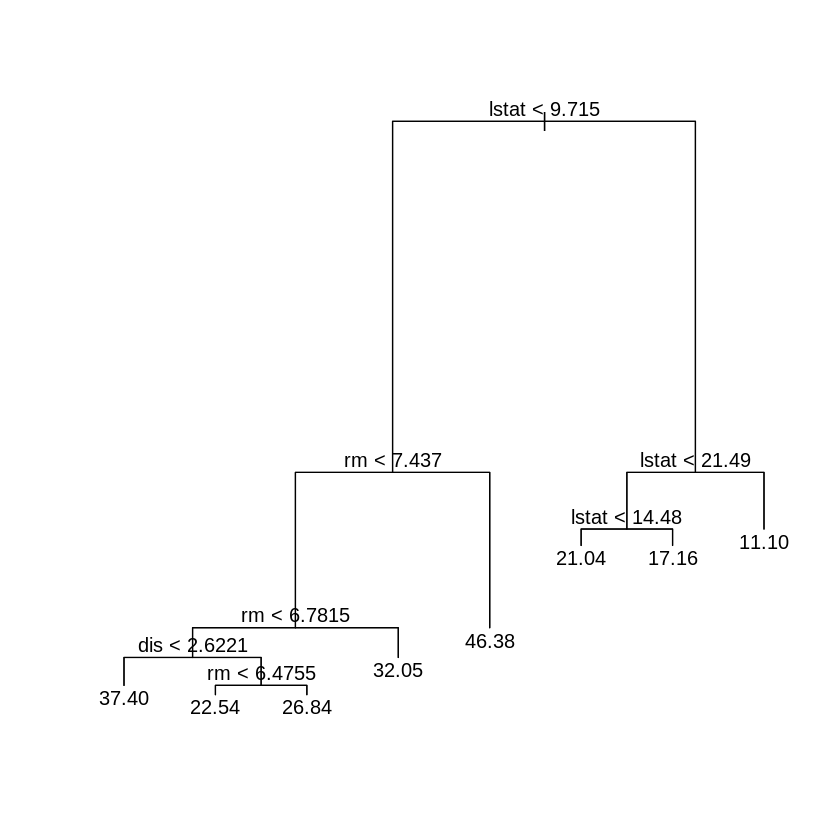

In [10]:
plot (tree.boston)
text (tree.boston, pretty = 0)

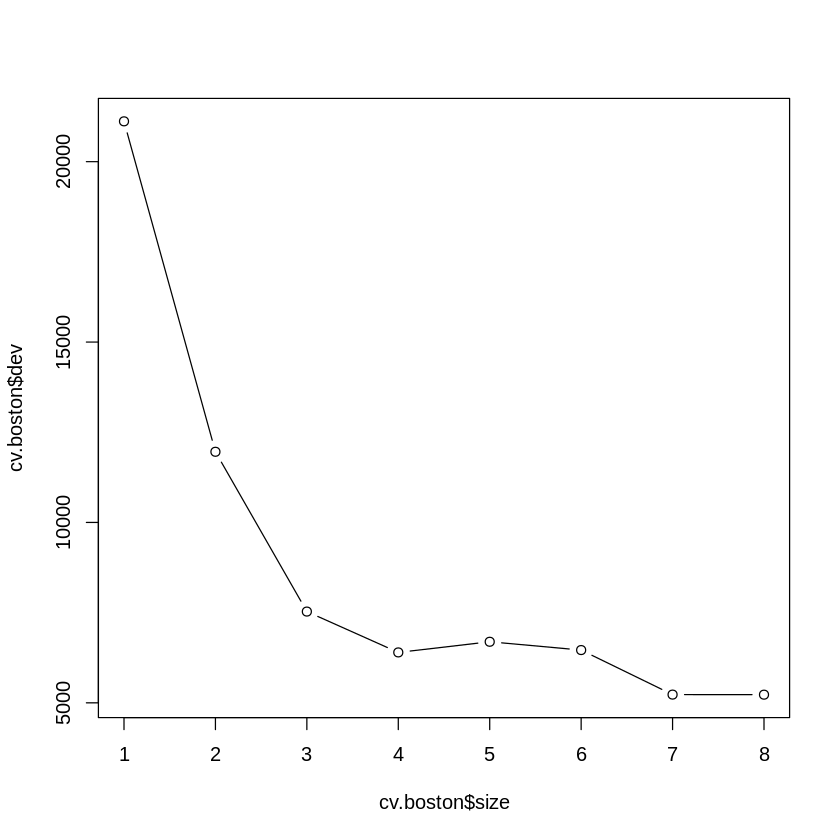

In [11]:
cv.boston = cv.tree (tree.boston)
plot (cv.boston$size, cv.boston$dev, type='b')

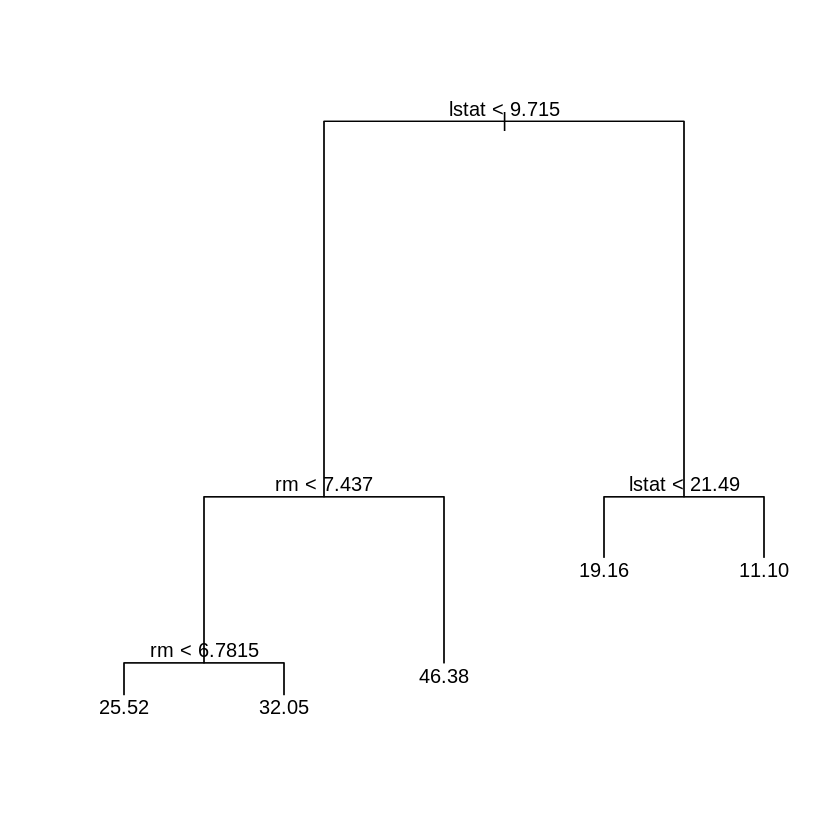

In [12]:
prune.boston =prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

[1] 25.04559

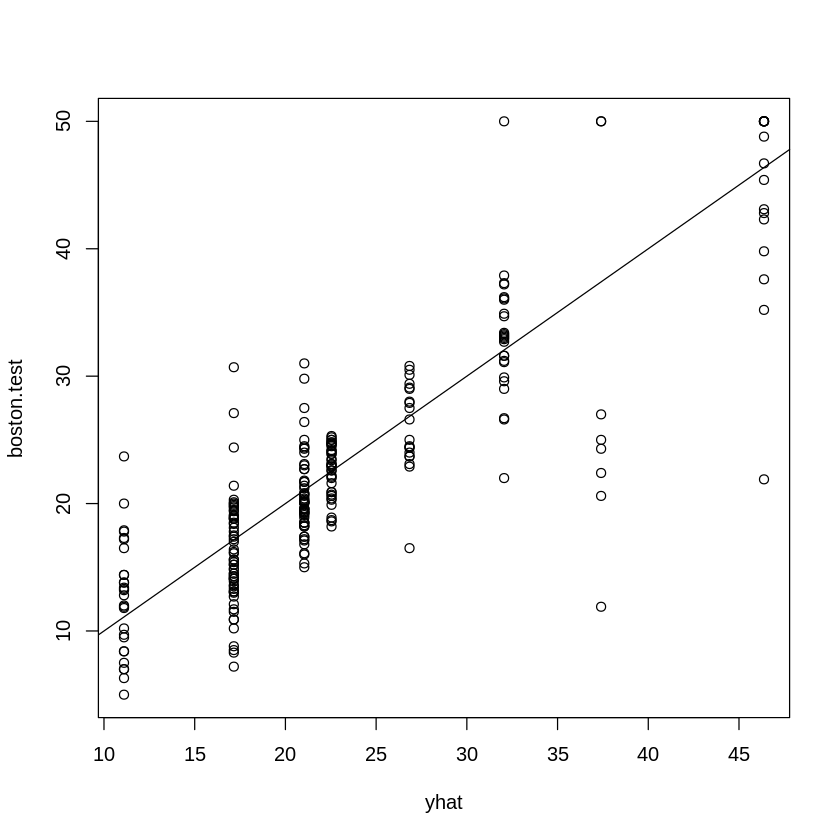

In [13]:
yhat=predict (tree.boston, newdata =Boston [-train,])
boston.test=Boston [-train,"medv"]
plot(yhat,boston.test)
abline (0,1)
mean((yhat -boston.test)^2)

[1] 26.83413

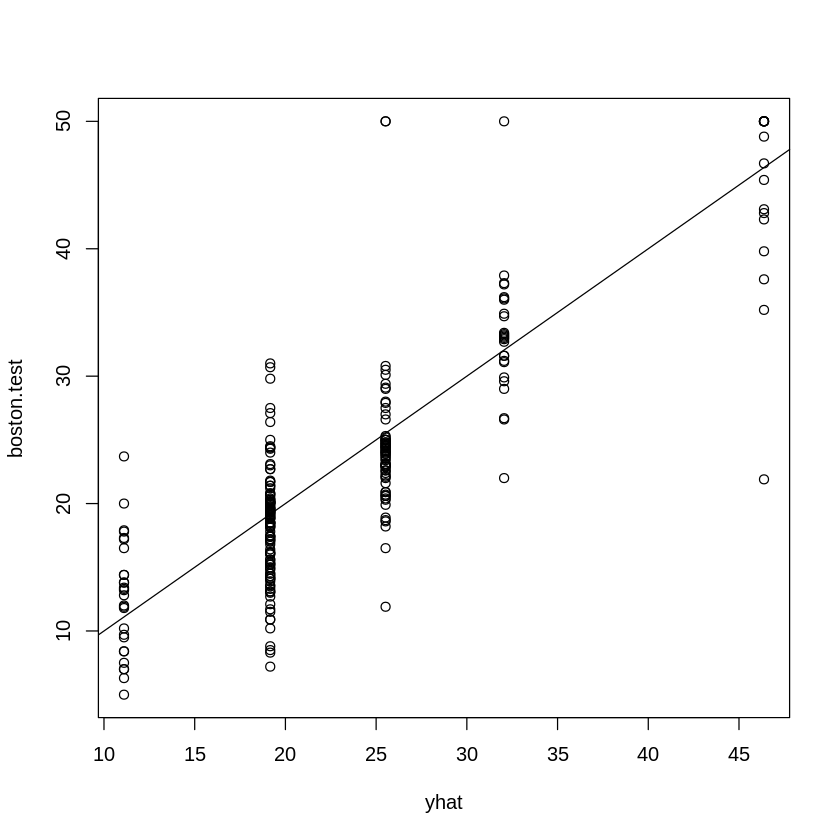

In [14]:
yhat=predict (prune.boston, newdata =Boston [-train,])
boston.test=Boston [-train,"medv"]
plot(yhat,boston.test)
abline (0,1)
mean((yhat -boston.test)^2)